In [45]:
# Industry HW3 
# Classification

In [46]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
# 1)
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
df = df.drop(columns='Unnamed: 0')

In [48]:
df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [49]:
# 2) change default and student to categorical variables
df['default'] = df['default'].map({'Yes': 1, 'No': 0})
df['student'] = df['student'].map({'Yes': 1, 'No': 0})

In [50]:
df = df
df.head(10)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


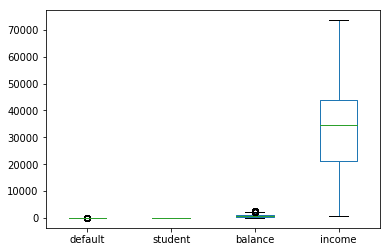

In [51]:
# 3) boxplot
import matplotlib.pyplot as plt
df.plot.box()
plt.show()

/Users/guanshan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


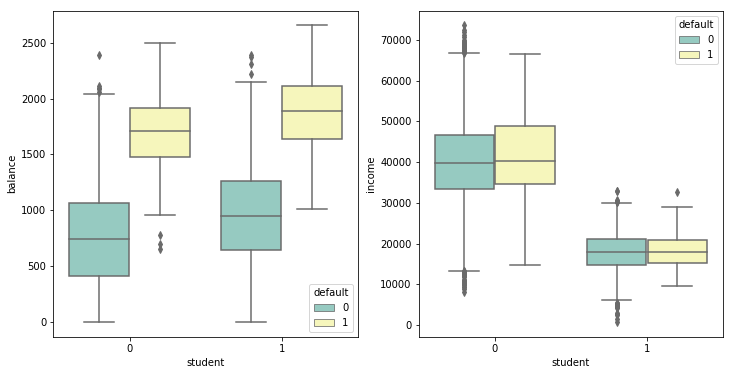

In [52]:
# 3）another boxplot
fig = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x="student", y="balance", hue="default",data=df, palette="Set3")
plt.subplot(1, 2, 2)
ax = sns.boxplot(x="student", y="income", hue="default",data=df, palette="Set3")
plt.show()

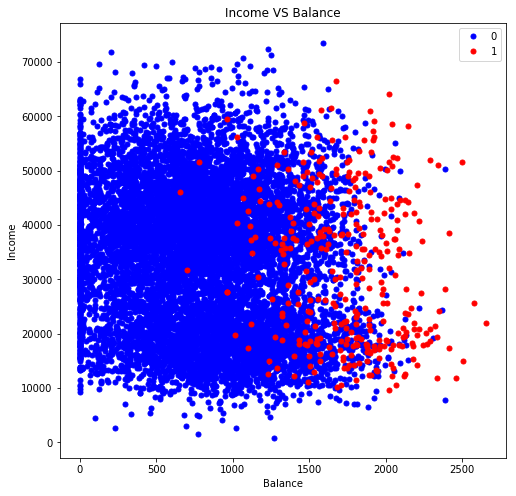

In [53]:
# scatterplot   
groups = df.groupby('default')

fig, ax = plt.subplots(figsize=(8, 8))
for name, group in groups:
    if name == 1:
        ax.plot(group.balance, group.income, marker='o', linestyle='', ms=5, color = 'r', label=name)
    else:
        ax.plot(group.balance, group.income, marker='o', linestyle='', ms=5, color = 'b', label=name)
ax.legend()

plt.title('Income VS Balance')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

In [54]:
# 4) Train a model to predict if a student defaults on their loan or not
# using LogisticRegression based soley on the balance and income variables. 
# Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [55]:
df['default'].value_counts()   # check the target vairable is binary

0    9667
1     333
Name: default, dtype: int64

In [56]:
df.isnull().sum()  # check the missing values

default    0
student    0
balance    0
income     0
dtype: int64

In [57]:
# select only student data
df2 = df.loc[df['student'] == 1]
df2.head()

,default,student,balance,income
1,0,1,817.180407,12106.134700
5,0,1,919.588530,7491.558572
7,0,1,808.667504,17600.451344
10,0,1,0.000000,21871.073089
11,0,1,1220.583753,13268.562221


In [58]:
# train and test data
X = df2[['balance','income']]
y = df2['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=10)


LogReg = LogisticRegression(penalty='l1')
clf = LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
coef = clf.coef_
a = coef[0]
b = clf.intercept_

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       844
          1       0.59      0.25      0.35        40

avg / total       0.95      0.96      0.95       884



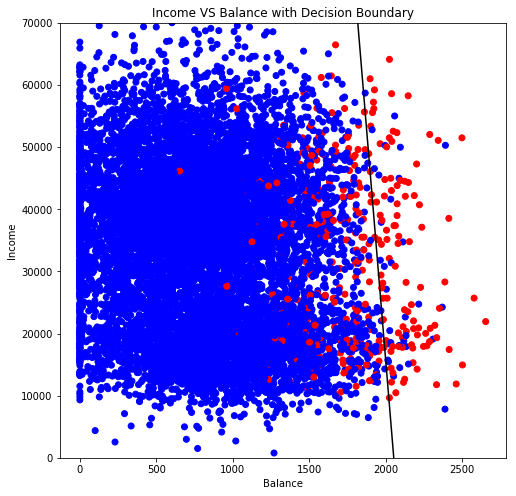

In [59]:
# decision boundary
# decision boundary highly depend on the splitting train/test

fig, ax = plt.subplots(figsize=(8, 8))
p = np.arange(0, 2600, 1)
q = (b+a[0]*p)/-a[1]

colors = df["default"]
colors = colors.replace(1,"r").replace(0,"b")
plt.scatter(df['balance'],df['income'],c = colors)

plt.plot(p, q, c='black')
plt.ylim(0, 70000)
plt.title('Income VS Balance with Decision Boundary')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

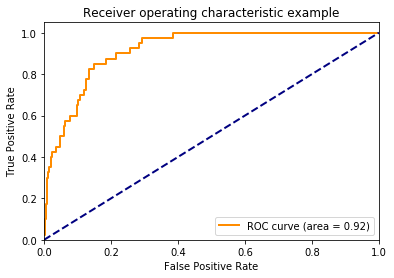

In [60]:
LogReg = LogisticRegression(penalty='l1')
clf = LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
coef = clf.coef_
a = coef[0]
b = clf.intercept_

# Compute ROC curve and ROC area 
y_score = clf.decision_function(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [61]:
# 5) Repeat 4) but with the student variable included. 
# Optimize using Ridge regression and plot the ranking of coefficients. 
# How does performance improve with the added variable?

In [62]:
# train and test data
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=10)


LogReg = LogisticRegression(penalty='l1')
clf = LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2888
          1       0.76      0.29      0.42       112

avg / total       0.97      0.97      0.96      3000



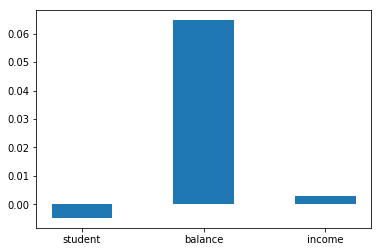

The coefficients: [-0.00483573  0.06472572  0.00296429]


In [64]:
# Ridge
# use Ridge to find the optimal lamda, then apply LASSO to perform model selection by using the result lamda
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X = df[['student','balance','income']]
y = df['default']

# standardize before using Ridge
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # test size can influence alpha

alpha = np.logspace(-5, -1, 100)
score=[]
for i in alpha:
    clf = Ridge(alpha = i)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
index = np.array(score).argmax()

clf = Ridge(alpha = alpha[index])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('student', 'balance','income'))
rects = ax.patches
plt.show()
print ('The coefficients:',clf.coef_)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2888
          1       0.82      0.24      0.37       112

avg / total       0.97      0.97      0.96      3000



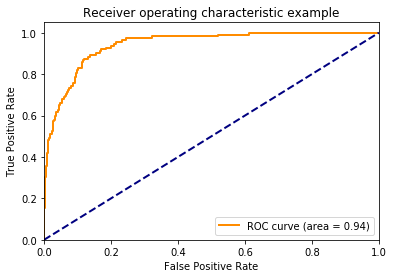

In [114]:
# train and test data
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=10)


LogReg = LogisticRegression(penalty='l1', C= alpha[index])
clf = LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Compute ROC curve and ROC area 
y_score = clf.decision_function(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Before Ridge, we had ROC area = 0.92, and now we have ROC area = 0.94. It increases in a certain level.

In [66]:
# 6) Using cross validation, check that the model you built in 5) is robust 
# (generalizes to other random folds of the dataset).

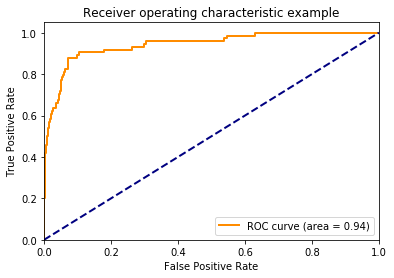

The ROC curve for random state is: 0


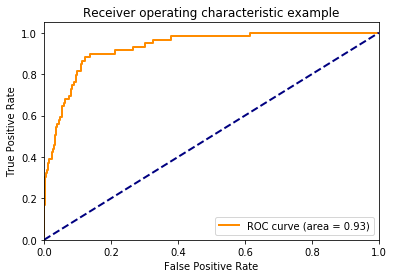

The ROC curve for random state is: 1


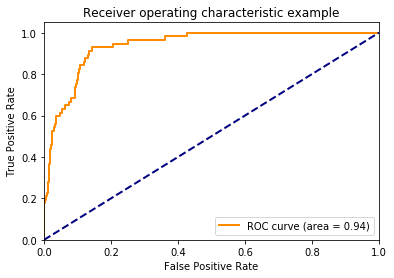

The ROC curve for random state is: 2


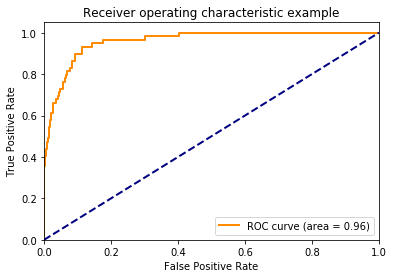

The ROC curve for random state is: 3


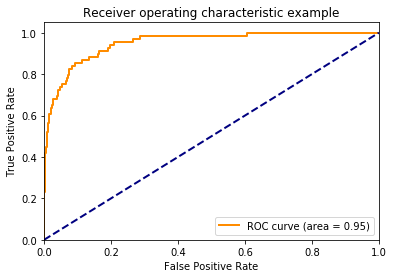

The ROC curve for random state is: 4


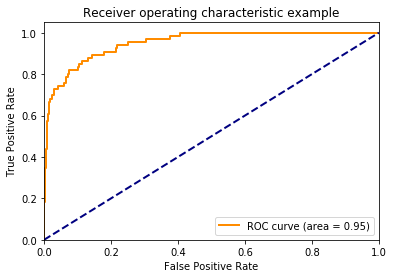

The ROC curve for random state is: 5


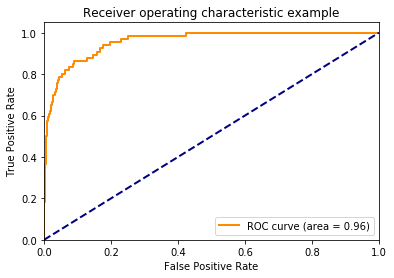

The ROC curve for random state is: 6


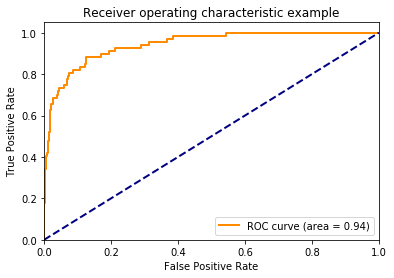

The ROC curve for random state is: 7


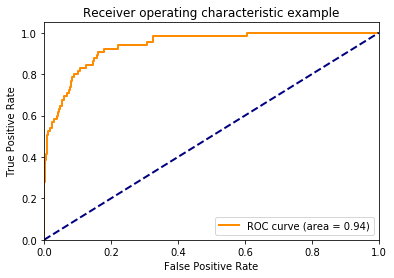

The ROC curve for random state is: 8


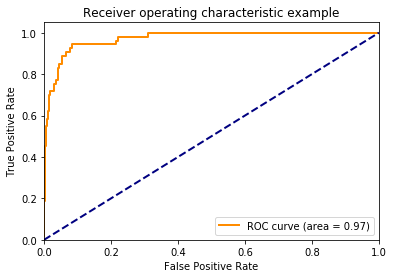

The ROC curve for random state is: 9


In [115]:
from sklearn.metrics import roc_curve, auc
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
    LogReg = LogisticRegression(penalty='l1', C = alpha[index])
    clf = LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    #plot
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print ("The ROC curve for random state is:", i)

In [ ]:
# we can see that the ROC area is between 0.93 and 0.97, and it is quite steady. So it is robust.

In [68]:
# 7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

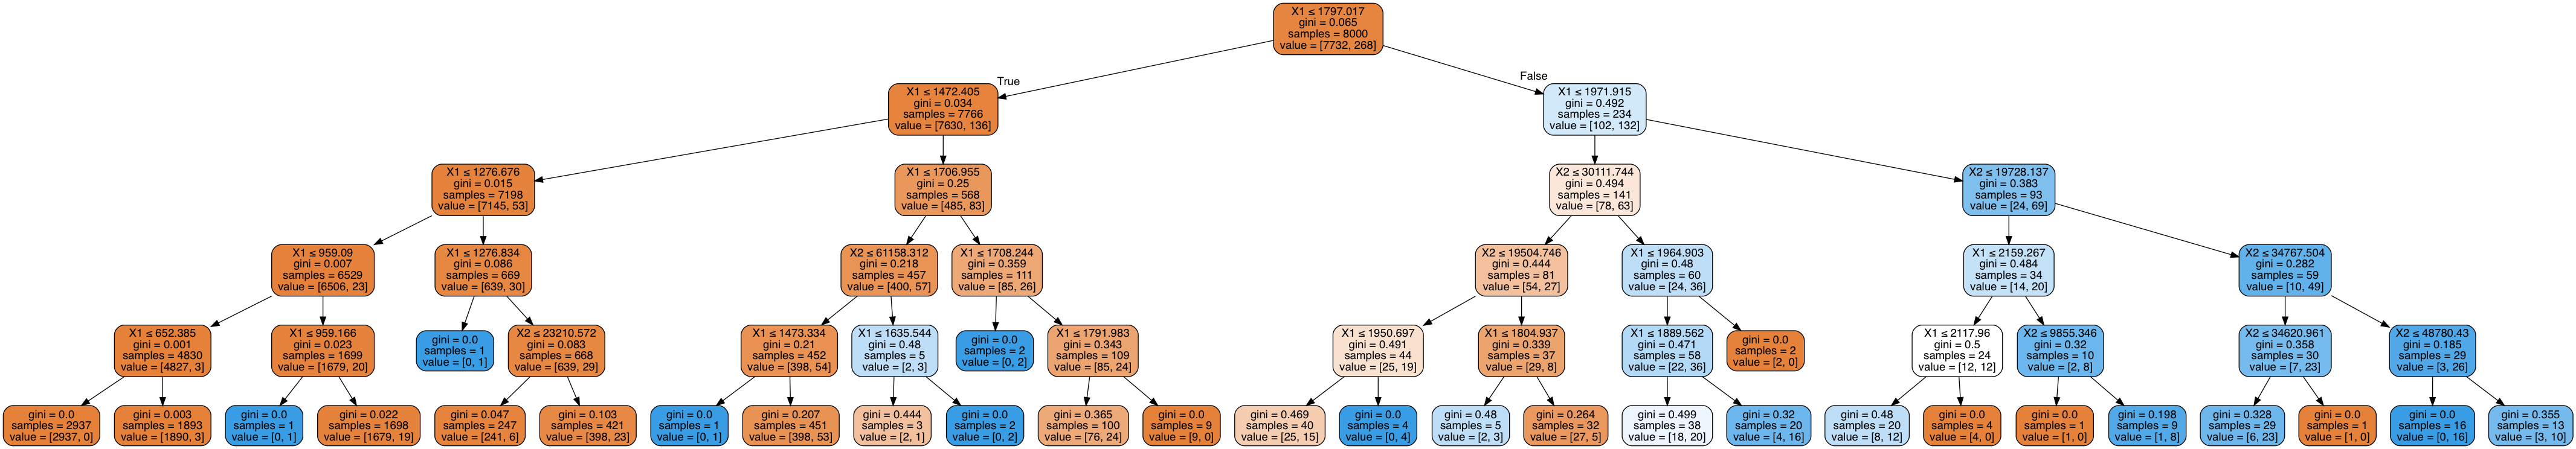

In [116]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

# plot decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

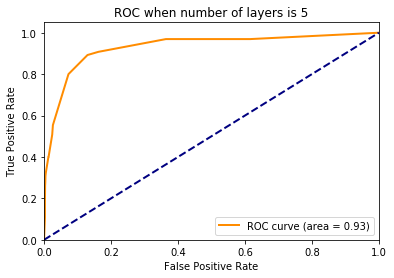

In [119]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC when number of layers is 5')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Now the ROC area = 0.93. It is similar to the 'l1' logistic regression.

In [ ]:
# 8) Find the optimal decision tree depth and compute the AUC ROC.

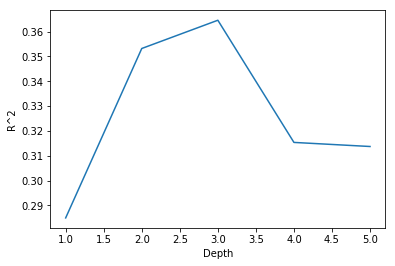

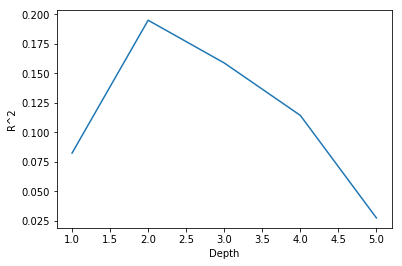

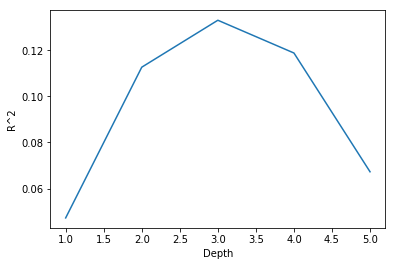

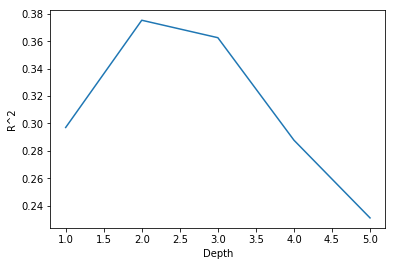

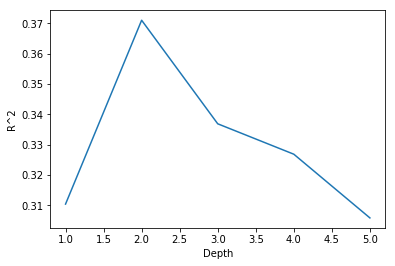

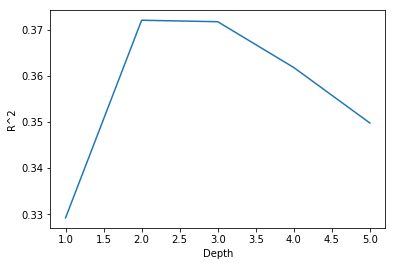

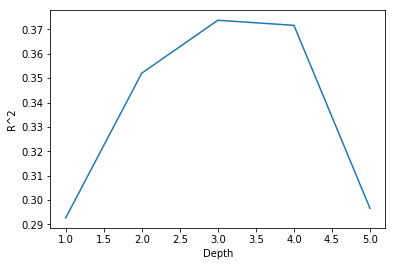

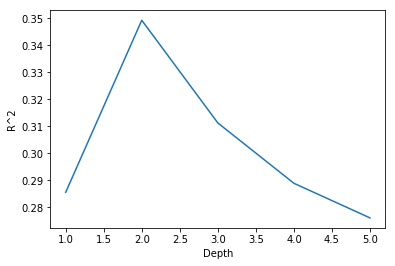

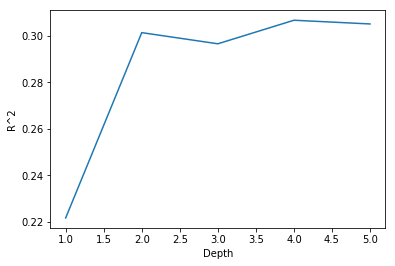

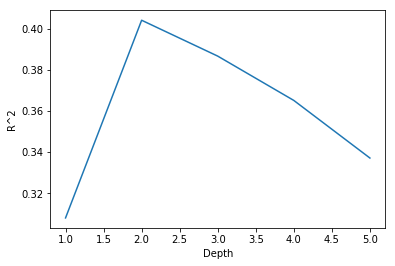

In [133]:
# Find the optimal decision tree depth

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# use cross validate to find the optimal number of layers
n_opt_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    train_errors=[]
    test_errors=[]
    
    depths = range(1,6)
    for n in depths:
        regr = DecisionTreeRegressor(max_depth=n)
        # Train the model using the training sets
        regr.fit(X_train, y_train)
        # get the R^2 by .score
        train_errors.append(regr.score(X_train,y_train))
        test_errors.append(regr.score(X_test,y_test))
    plt.ylabel('R^2')
    plt.xlabel('Depth')
    plt.plot(depths, test_errors)
    plt.show()
    n_opt = depths[np.argmax(test_errors)]
    n_opt_list.append(n_opt)

In [134]:
from collections import Counter
Counter(n_opt_list)

Counter({2: 6, 3: 3, 4: 1})

In [ ]:
# Thus, we can conclude that 2 layers is the optimal choice.

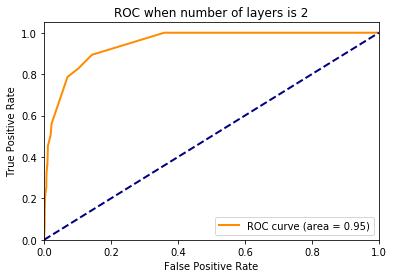

In [132]:
# plot ROC when # of layer = 2
from sklearn.tree import DecisionTreeClassifier
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30)
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC when number of layers is 2')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Now the ROC area = 0.95, higher than 0.93 from max layer = 5. So using max layer = 2 improve the problem of overfitting.